In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))        

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb
from time import process_time

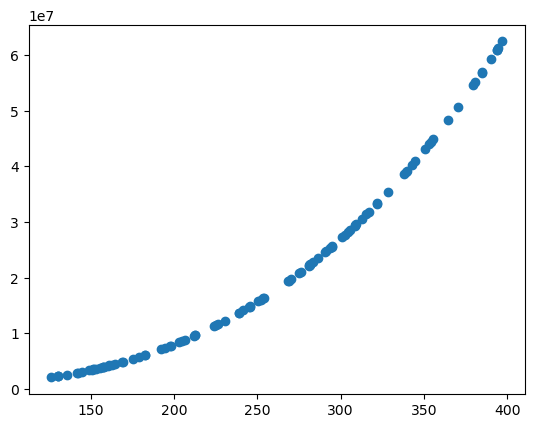

,X1,y
0,275.923714,2.100718e+07
1,321.677076,3.328593e+07
2,290.759928,2.458126e+07
3,274.842875,2.076128e+07
4,241.505070,1.408574e+07


In [6]:
def generate_data(ran,m=100,n=1,noise=0.1):
    
    ones = np.ones((m,1))
    np.random.seed(ran)
    X1 = np.random.uniform(low = 125.0 ,high = 400.0 ,size = (m,))
#     X2 = np.random.uniform(low = 125.0 ,high = 400.0 ,size = (m,))
    
#     Multivaiate 
#     y = np.array(20*(X1**2) - 13*(X2**2) + 108*(X2) + 12)

#     univariate
    y = X1**3 + 32 
    
#     DF = pd.DataFrame({'X1':X1,'X2':X2,'y':y})
    DF = pd.DataFrame({'X1':X1,'y':y})
    
    plt.scatter(X1,y)
    plt.show()
    plt.close()
#     plt.scatter(X2,y)
#     plt.show()
#     plt.close()
    
    return DF

DF = generate_data(0)

DF.head()

<Axes: >

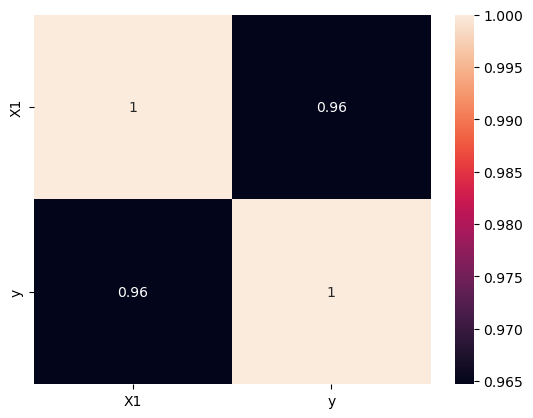

In [7]:
sb.heatmap(DF.corr(),annot=True)

In [8]:
def normalise(X):
    
    X = (X - X.mean()) / X.std() 
    
    return X

In [9]:
def preprocess(X):
#     input,output type: DataFrame 
    
    poly = PolynomialFeatures(2)
    temp = poly.fit_transform(X)
    temp = pd.DataFrame(temp)
    temp.columns = poly.get_feature_names_out(X.columns)
    temp.iloc[:,1:] = normalise(temp.iloc[:,1:])
    vn = len(temp.columns)
    
    return temp ,vn

In [10]:
def h(X,theta):
#     X:(m,vn) ,theta:(vn,1)
    return X@theta # (vn,1)

In [11]:
def j(X,y,theta):
    
    temp = (h(X,theta) - y)**2
    c = 1/(2*m)
    temp = np.sum(temp,axis=1)[0]
    
    return c*temp

In [12]:
def G(X,y,theta,alpha,lambda_):
    
    temp1 = (alpha*lambda_)/m # int
    temp2 = X.transpose() # (vn,m)
    temp3 = h(X,theta) - y # (m,1)
    temp4 = temp2 @ temp3 # (vn,1)
#     print(temp1,temp2.shape,temp3.shape,temp4.shape)
    
    return theta - (temp1 * temp4)

In [13]:
def GD(X,y,alpha,lambda_,thresh):
    
    cols = X.columns
    X = X.values
    y = y.values.reshape(-1,1)
    
    theta = np.random.rand(vn,1)
    iter_ = 1
    cost_diff = 1
    m = len(X)
    
    init_cost = j(X,y,theta)
    print("initial cost: ",init_cost)
    
    costs = [init_cost]
    
    while cost_diff >= thresh:
#     while iter_ <= 100:
        
        cur_cost = j(X,y,theta)
        theta = G(X,y,theta,alpha,lambda_)
        after_cost = j(X,y,theta)
        costs.append(after_cost)
        
        cost_diff = cur_cost - after_cost
        iter_ += 1
        
    print("Final Cost: ",costs[-1])
    print("Total interations: ",iter_)
    
    plt.plot(costs)
    
    return theta
    

In [14]:
X_DF = DF.drop(['y'],axis=1)
y_DF = DF['y']
n = len(X_DF.columns)+1

poly, vn = preprocess(X_DF)
print(vn,n)
poly.head()

3 2


,1,X1,X1^2
0,1.0,0.262359,0.116052
1,1.0,0.836556,0.775228
2,1.0,0.448551,0.318741
3,1.0,0.248795,0.101701
4,1.0,-0.169589,-0.313298


initial cost:  2206507721906.932
Final Cost:  80413.06534800335
Total interations:  1811


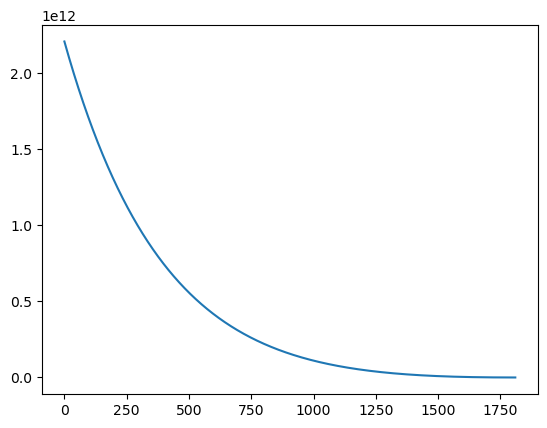

In [15]:
alpha = 1e-3
lambda_ = 1
thresh = 0.01
m = poly.shape[0]

theta = GD(poly,y_DF,alpha,lambda_,thresh)

In [16]:
theta

array([[17924559.24277079],
       [ 7899293.0900291 ],
       [ 8738983.88375173]])

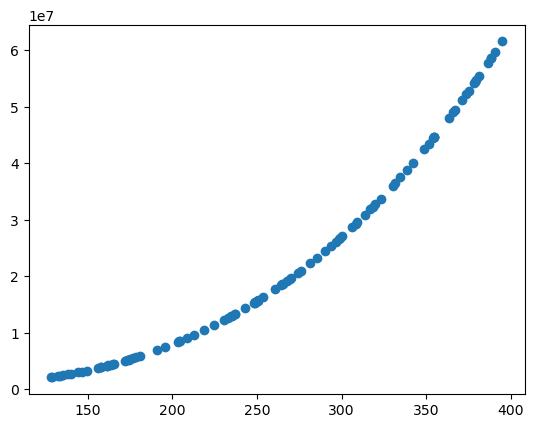

In [17]:
test_DF = generate_data(40)

In [18]:
def predict(X,theta):
    
    poly_test, vn = preprocess(X)
    poly_test = poly_test.values
    
    return h(poly_test,theta)

In [19]:
X_test = test_DF.drop(['y'],axis=1)
y_test = test_DF['y']
n = len(X_test.columns)+1
y_pred = predict(X_test,theta)
y_pred.shape

(100, 1)

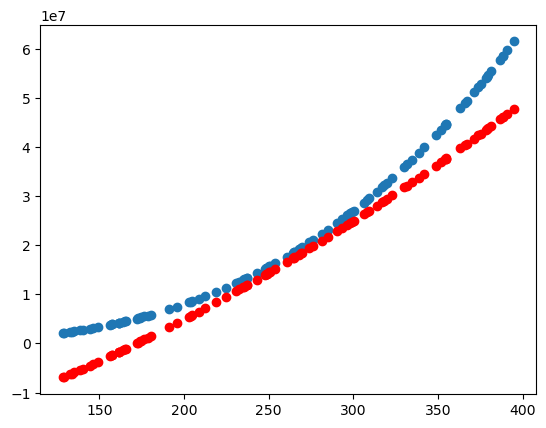

In [20]:
plt.scatter(X_test['X1'],y_test)
plt.scatter(X_test['X1'],y_pred,c='r')
plt.show()
plt.close()
# plt.scatter(X_test['X2'],y_test)
# plt.scatter(X_test['X2'],y_pred,c='r')